In [ ]:
https://www.kaggle.com/sagnik1511/car-insurance-data

# **Страхование автомобилей**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import os 
from collections import Counter

# 1. Загружаем данные

In [2]:
df = pd.read_csv('C:\\Users\\Наташа\\Desktop\\IntensiveML\\data\\Car_Insurance_Claim.csv')

In [3]:
df.shape

(10000, 19)

In [4]:
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


# 2. Задача и признаки

В датафрейме преставлены данные о страхователях, их автомобилях, в целевом - обращались ли страхователи за убытком , Итого задача классификации
19 колонок

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

ID                   ID 
 1   AGE                  возраст 
 2   GENDER               пол 
 3   RACE                 раса
 4   DRIVING_EXPERIENCE   опыт вождения
 5   EDUCATION            образование 
 6   INCOME               уровень дохода 
 7   CREDIT_SCORE         кредитный рейтинг
 8   VEHICLE_OWNERSHIP    владение транспортным средством
 9   VEHICLE_YEAR         год автомобиля
 10  MARRIED              женат\замужем
 11  CHILDREN             наличие детей
 12  POSTAL_CODE          почтовый индекс  
 13  ANNUAL_MILEAGE       годовой пробег
 14  VEHICLE_TYPE         тип кузова 
 15  SPEEDING_VIOLATIONS  нарушение скоростного режима 
 16  DUIS                 вождение в нетрезвом виде  
 17  PAST_ACCIDENTS       прошлые несчастные случаи 
 18  OUTCOME              обращение за страховкой  

# 2.1. Задача и признаки - для начала разделим данные на количественные и категориальные

In [6]:
dtypes = df.dtypes # типы данных колонок датасета, необходимо разделение, тк в предобработке
#данных потребуется преобразование категориальных в количественные
num_dtypes = dtypes[dtypes!='object']
num_dtypes

ID                       int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [7]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
obj_dtypes = dtypes[dtypes =='object']
obj_dtypes #итого, 8 признаков потребуется преобразовать в количественные

AGE                   object
GENDER                object
RACE                  object
DRIVING_EXPERIENCE    object
EDUCATION             object
INCOME                object
VEHICLE_YEAR          object
VEHICLE_TYPE          object
dtype: object

In [9]:
df.describe(include=['object'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Визуализировать взаимосвязи колонок  по типу анализируемых колонок на:
1)Анализ взаимосвязи категориальной и числовой переменных
2)Анализ взаимосвязи двух числовых переменных
3)Анализ взаимосвязи двух категориальных переменных

In [10]:
df['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

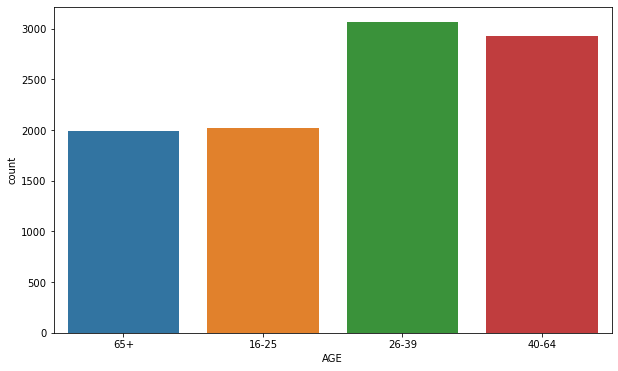

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='AGE', data=df)

In [12]:
age_counts = df['AGE'].value_counts()
age_counts

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

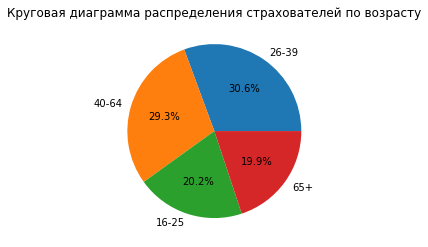

In [13]:
plt.pie(age_counts.values, labels = age_counts.index, autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения страхователей по возрасту') # Добавление подписи к графику
plt.show()

У двух количественных признаков есть пропущенные значение (почти 10% от всех значений) - заменим его на медиану

In [5]:
skip = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
df[skip].median(axis = 0)

CREDIT_SCORE          0.525033
ANNUAL_MILEAGE    12000.000000
dtype: float64

In [6]:
df[skip] = df[skip].fillna(df[skip].median(axis = 0), axis=0)

In [7]:
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

array([[<AxesSubplot:xlabel='ID', ylabel='ID'>,
        <AxesSubplot:xlabel='CREDIT_SCORE', ylabel='ID'>,
        <AxesSubplot:xlabel='VEHICLE_OWNERSHIP', ylabel='ID'>,
        <AxesSubplot:xlabel='MARRIED', ylabel='ID'>,
        <AxesSubplot:xlabel='CHILDREN', ylabel='ID'>,
        <AxesSubplot:xlabel='POSTAL_CODE', ylabel='ID'>,
        <AxesSubplot:xlabel='ANNUAL_MILEAGE', ylabel='ID'>,
        <AxesSubplot:xlabel='SPEEDING_VIOLATIONS', ylabel='ID'>,
        <AxesSubplot:xlabel='DUIS', ylabel='ID'>,
        <AxesSubplot:xlabel='PAST_ACCIDENTS', ylabel='ID'>,
        <AxesSubplot:xlabel='OUTCOME', ylabel='ID'>],
       [<AxesSubplot:xlabel='ID', ylabel='CREDIT_SCORE'>,
        <AxesSubplot:xlabel='CREDIT_SCORE', ylabel='CREDIT_SCORE'>,
        <AxesSubplot:xlabel='VEHICLE_OWNERSHIP', ylabel='CREDIT_SCORE'>,
        <AxesSubplot:xlabel='MARRIED', ylabel='CREDIT_SCORE'>,
        <AxesSubplot:xlabel='CHILDREN', ylabel='CREDIT_SCORE'>,
        <AxesSubplot:xlabel='POSTAL_CODE', ylabel='C

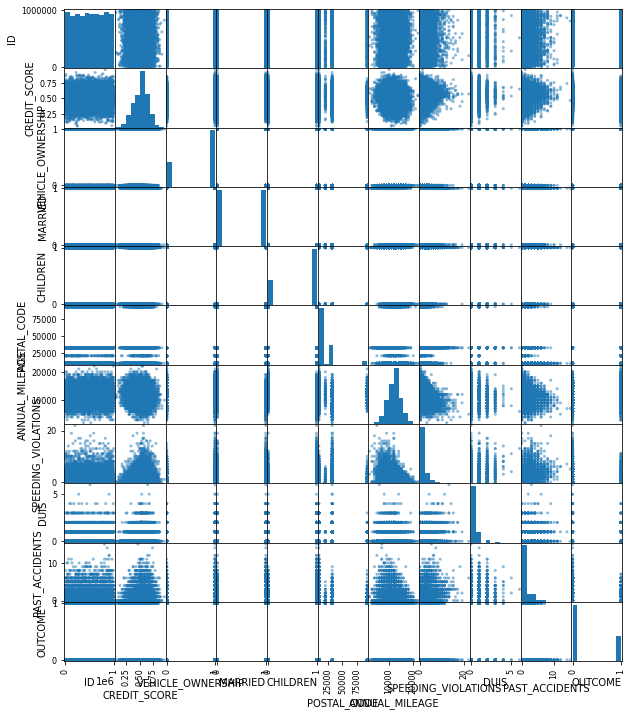

In [17]:
pd.plotting.scatter_matrix(df, figsize = (10, 12))

In [19]:
#sns.boxplot(x='DRIVING_EXPERIENCE', y='OUTCOME', data=df, showfliers=False)

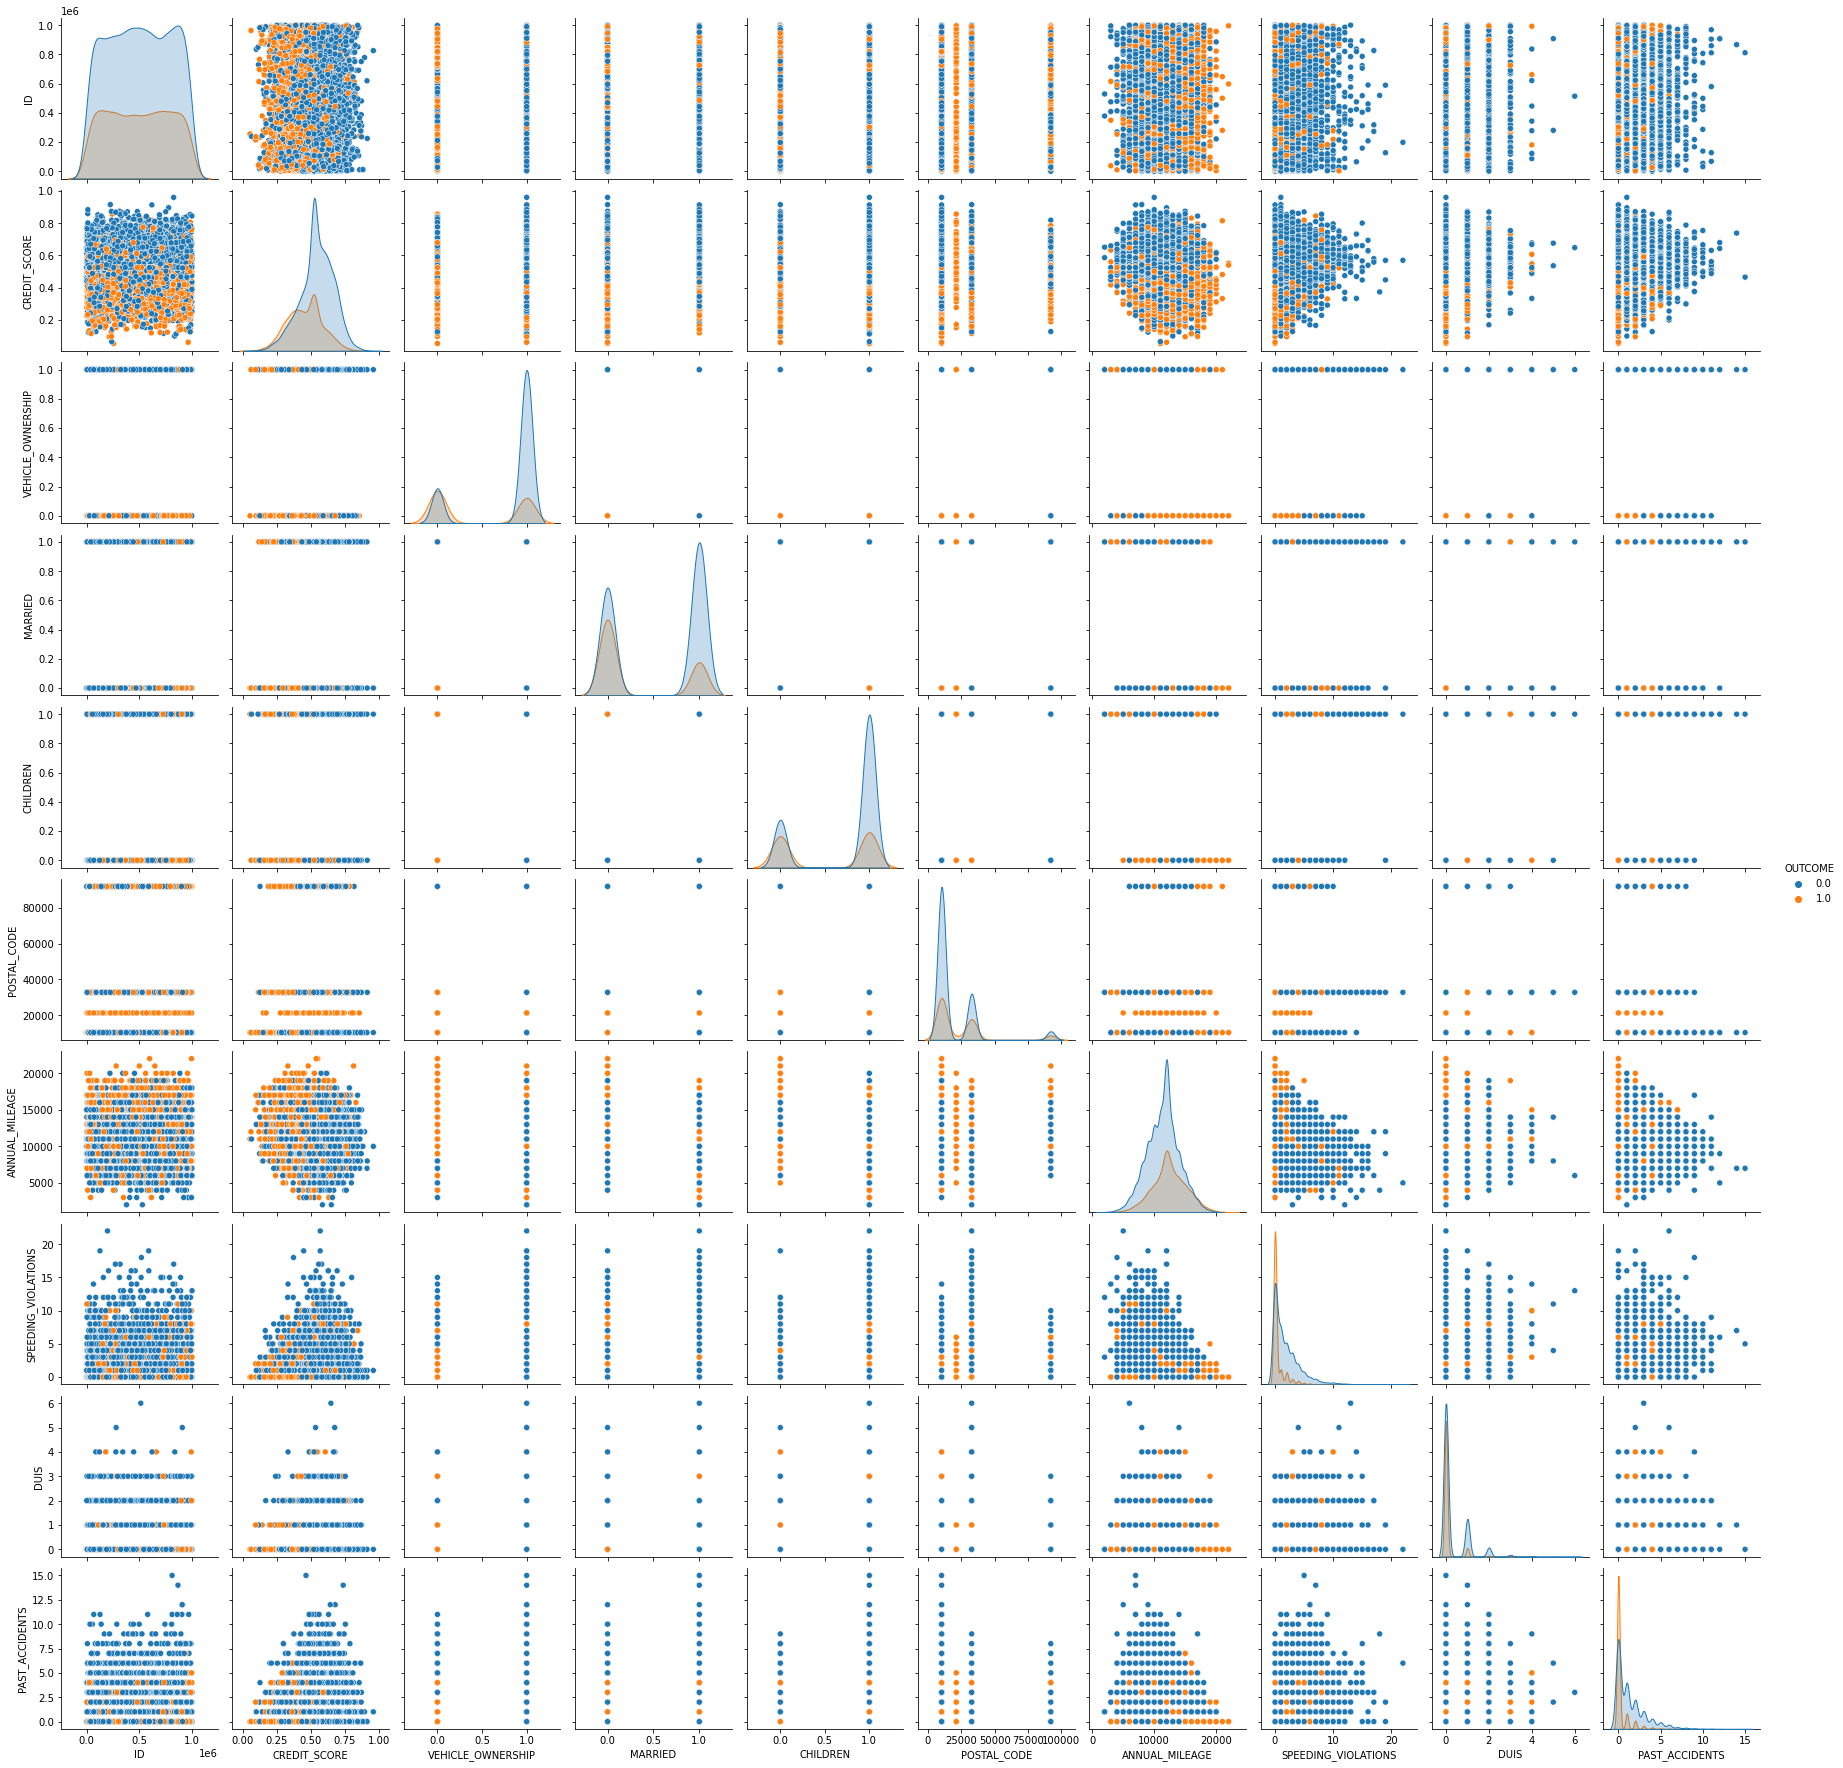

In [17]:
sns.pairplot(data=df[list(df.columns[df.dtypes != object])], hue='OUTCOME')

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

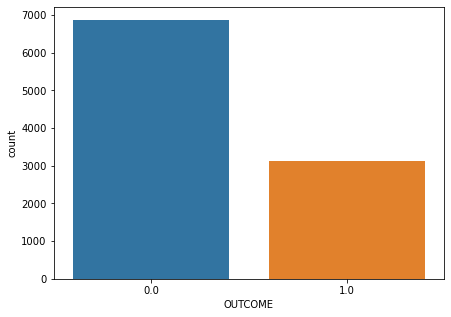

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(x='OUTCOME', data=df)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'CREDIT_SCORE'}>,
        <AxesSubplot:title={'center':'VEHICLE_OWNERSHIP'}>],
       [<AxesSubplot:title={'center':'MARRIED'}>,
        <AxesSubplot:title={'center':'CHILDREN'}>,
        <AxesSubplot:title={'center':'POSTAL_CODE'}>],
       [<AxesSubplot:title={'center':'ANNUAL_MILEAGE'}>,
        <AxesSubplot:title={'center':'SPEEDING_VIOLATIONS'}>,
        <AxesSubplot:title={'center':'DUIS'}>],
       [<AxesSubplot:title={'center':'PAST_ACCIDENTS'}>,
        <AxesSubplot:title={'center':'OUTCOME'}>, <AxesSubplot:>]],
      dtype=object)

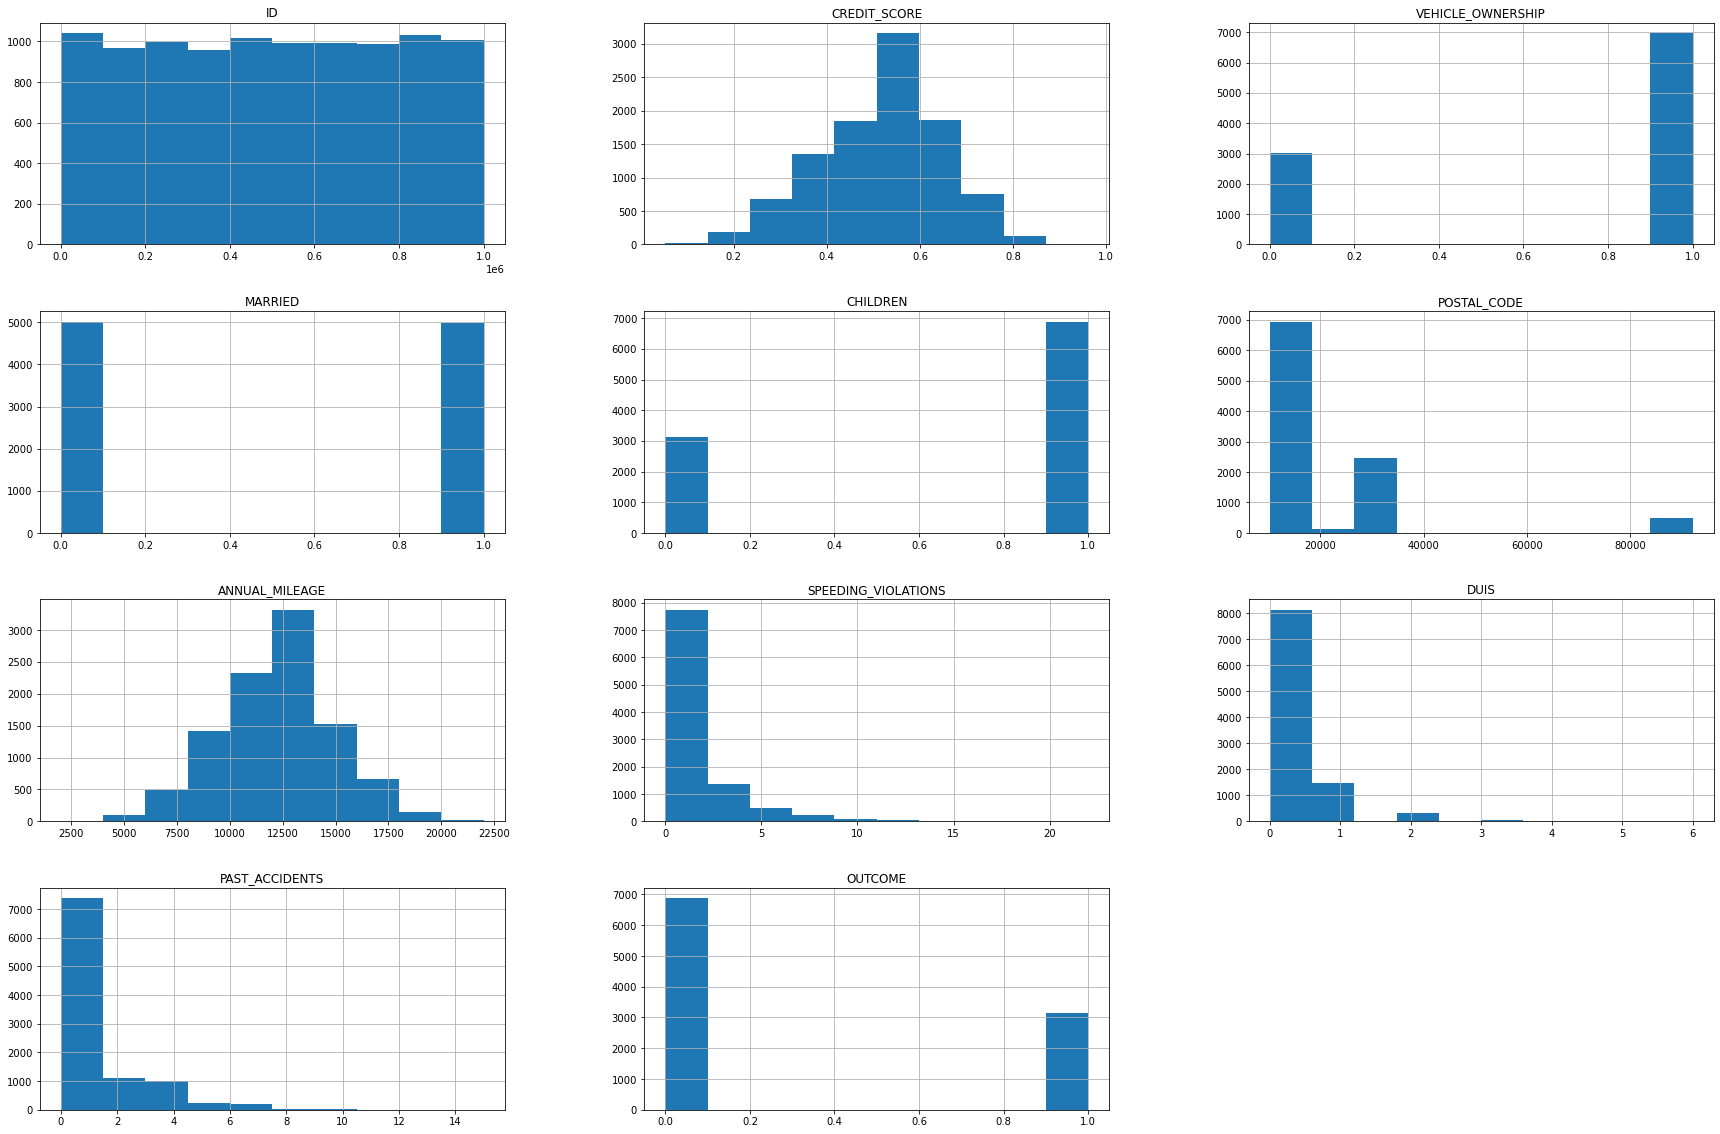

In [19]:
df.hist(figsize=(30,20))

In [23]:
df.corr()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001416,0.009197,0.014826,0.001233,0.006038,-0.002085,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001416,1.000000,0.295310,0.266744,0.209448,0.008759,-0.157839,0.194658,0.120966,0.172008,-0.308998
VEHICLE_OWNERSHIP,0.009197,0.295310,1.000000,0.175626,0.125990,-0.004866,-0.092527,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.266744,0.175626,1.000000,0.287009,0.012045,-0.439227,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.209448,0.125990,0.287009,1.000000,0.020911,-0.425509,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.008759,-0.004866,0.012045,0.020911,1.000000,-0.126802,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002085,-0.157839,-0.092527,-0.439227,-0.425509,-0.126802,1.000000,-0.308303,-0.111454,-0.187678,0.178041
SPEEDING_VIOLATIONS,0.008156,0.194658,0.133868,0.218855,0.220415,0.113686,-0.308303,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.120966,0.086567,0.120840,0.115354,0.038492,-0.111454,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.172008,0.119521,0.215269,0.206295,-0.116985,-0.187678,0.443074,0.259359,1.000000,-0.311495


<AxesSubplot:>

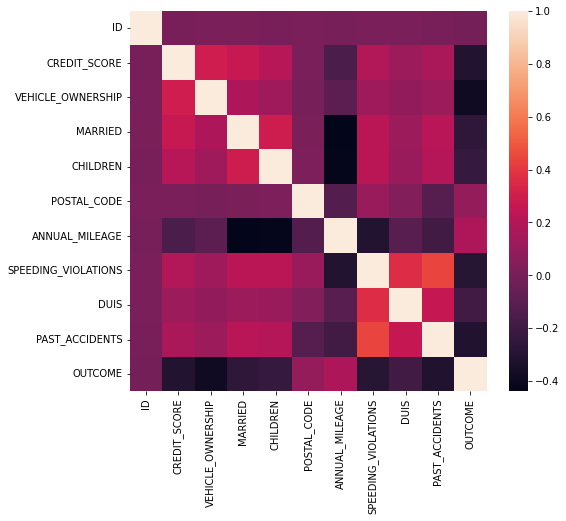

In [20]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr()) 

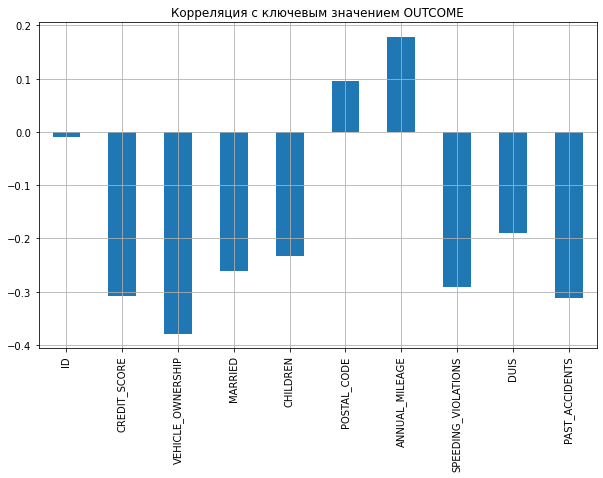

In [19]:
df.drop('OUTCOME', axis=1).corrwith(df.OUTCOME).plot(kind='bar', grid=True, figsize=(10, 6), title="Корреляция с ключевым значением OUTCOME",);

На графике выше можно отметить полное отсутствие взаимосвязи OUTCOME с признаком ID (хотя и логично , что это просто название, тем не менее на графике и хитмапе это можно отобразить) и несильное влияние POSTAL_CODE - тоже удалить

# Выбросы

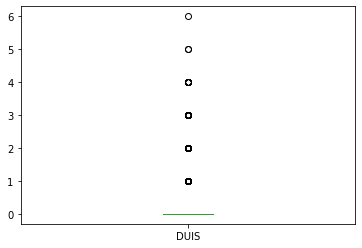

In [26]:
df['DUIS'].plot(kind='box')
pass

С помощью боксплота проверила все количественные признаки - но критических выбросов не обнаружено

# Преобразование качественных признаков в количественные

Для корректной работы в качестве входных данных мы должны передавать только численные признаки, поэтому для них необходимы такие преобразования (категориальный признак -> некоторые численное представление). Наиболее популярные кодировщики Label и One-Hot encoder'ы.(в библиотеке sklearn).  я буду испльзовать OneHotEncoder.

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(df[['AGE', 'GENDER', 'RACE', 
                 'DRIVING_EXPERIENCE', 'EDUCATION', 
                 'INCOME','VEHICLE_YEAR','VEHICLE_TYPE']])

OneHotEncoder(drop='if_binary', sparse=False)

In [10]:
dummies = pd.DataFrame(enc.transform(df[['AGE', 'GENDER', 'RACE', 
                 'DRIVING_EXPERIENCE', 'EDUCATION', 
                 'INCOME','VEHICLE_YEAR','VEHICLE_TYPE']]), 
                       columns=enc.get_feature_names(), index=df.index)
dummies.head()

,x0_16-25,x0_26-39,x0_40-64,x0_65+,x1_male,x2_minority,x3_0-9y,x3_10-19y,x3_20-29y,x3_30y+,x4_high school,x4_none,x4_university,x5_middle class,x5_poverty,x5_upper class,x5_working class,x6_before 2015,x7_sports car
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
df_2 = pd.concat((df, dummies), axis=1).drop(['AGE', 'GENDER', 'RACE', 
                 'DRIVING_EXPERIENCE', 'EDUCATION', 
                 'INCOME','VEHICLE_YEAR','VEHICLE_TYPE'], axis=1)

In [12]:
df_2['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [13]:
df_2.isnull().sum()

ID                     0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
x0_16-25               0
x0_26-39               0
x0_40-64               0
x0_65+                 0
x1_male                0
x2_minority            0
x3_0-9y                0
x3_10-19y              0
x3_20-29y              0
x3_30y+                0
x4_high school         0
x4_none                0
x4_university          0
x5_middle class        0
x5_poverty             0
x5_upper class         0
x5_working class       0
x6_before 2015         0
x7_sports car          0
dtype: int64

Для численных признаков пропуски заменю медианой 

In [14]:
swap = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
df_2[swap].median(axis = 0)

CREDIT_SCORE          0.525033
ANNUAL_MILEAGE    12000.000000
dtype: float64

In [15]:
df_2[swap] = df_2[swap].fillna(df_2[swap].median(axis = 0), axis=0)

In [16]:
df_2.isnull().sum()

ID                     0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
x0_16-25               0
x0_26-39               0
x0_40-64               0
x0_65+                 0
x1_male                0
x2_minority            0
x3_0-9y                0
x3_10-19y              0
x3_20-29y              0
x3_30y+                0
x4_high school         0
x4_none                0
x4_university          0
x5_middle class        0
x5_poverty             0
x5_upper class         0
x5_working class       0
x6_before 2015         0
x7_sports car          0
dtype: int64

# Разделим на тестовую и обучающую выборки

Перед этим лучше перевести значение таргета из типа float в int

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_2['outcome'] = df_2['OUTCOME'].astype(int)

In [19]:
df_2['outcome']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: outcome, Length: 10000, dtype: int32

In [20]:
X = df_2.drop(['outcome', 'ID', 'POSTAL_CODE'], axis=1)
y = df_2['outcome']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,x0_16-25,...,x3_30y+,x4_high school,x4_none,x4_university,x5_middle class,x5_poverty,x5_upper class,x5_working class,x6_before 2015,x7_sports car
2671,0.806496,0.0,1.0,1.0,14000.0,2,0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
293,0.431700,0.0,0.0,1.0,10000.0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7298,0.585968,1.0,0.0,0.0,12000.0,0,0,0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8050,0.681998,0.0,1.0,1.0,6000.0,11,1,2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2117,0.525033,1.0,0.0,0.0,17000.0,0,0,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,0.347138,1.0,0.0,1.0,12000.0,0,0,0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
921,0.476437,1.0,1.0,1.0,9000.0,5,2,1,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3189,0.644714,1.0,0.0,0.0,15000.0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2113,0.316955,0.0,1.0,1.0,5000.0,0,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
y_train

2671    1
293     1
7298    1
8050    1
2117    1
       ..
4265    1
921     0
3189    1
2113    1
7171    0
Name: outcome, Length: 7500, dtype: int32

In [35]:
y_test

3805    0
4495    0
7821    0
6383    0
3634    0
       ..
7546    1
2383    0
8469    1
1065    0
6744    0
Name: outcome, Length: 2500, dtype: int32

Т. к это задача классификации, то можно рассмотреть следующие методы( в скобках основные гиперпараметры, чтоб не запутаться): 
1) KNN - n_neighbors, p
2) Logistic Regression - penalty, C
3) Decision Tree - criterion, max_depth
4) SVM - C, kernel

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
import numpy as np

In [40]:
knn = KNeighborsClassifier() 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold, KFold
k_range = list(range(3,7,2)) #list(range(1,15,2)) 
p_range = [1, 8]  #[1, 2, 4, 8, 16] 
param_grid = dict(n_neighbors = k_range, p = p_range) 
# defining parameter range 
grid = GridSearchCV(knn, param_grid, cv = 4, scoring = 'accuracy', 
                    return_train_score = False, verbose = 3) #verbose = 3 установила для детализации описания
# fitting the model for grid search 
grid_search = grid.fit(X_train, y_train)
#https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END ................n_neighbors=3, p=1;, score=0.905 total time=   0.9s
[CV 2/4] END ................n_neighbors=3, p=1;, score=0.924 total time=   0.7s
[CV 3/4] END ................n_neighbors=3, p=1;, score=0.918 total time=   0.7s
[CV 4/4] END ................n_neighbors=3, p=1;, score=0.911 total time=   0.8s
[CV 1/4] END ................n_neighbors=3, p=8;, score=0.898 total time=   7.8s
[CV 2/4] END ................n_neighbors=3, p=8;, score=0.918 total time=   7.8s
[CV 3/4] END ................n_neighbors=3, p=8;, score=0.906 total time=   7.8s
[CV 4/4] END ................n_neighbors=3, p=8;, score=0.908 total time=   7.8s
[CV 1/4] END ................n_neighbors=5, p=1;, score=0.913 total time=   0.8s
[CV 2/4] END ................n_neighbors=5, p=1;, score=0.930 total time=   0.8s
[CV 3/4] END ................n_neighbors=5, p=1;, score=0.922 total time=   0.9s
[CV 4/4] END ................n_neighbors=5, p=1;,

In [41]:
print(grid_search.best_params_, grid_search.best_score_)

{'n_neighbors': 5, 'p': 1} 0.9201333333333334


In [42]:
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)
y_train_predict

array([0, 1, 1, ..., 1, 1, 0])

In [43]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1694
           1       0.93      0.83      0.88       806

    accuracy                           0.92      2500
   macro avg       0.92      0.90      0.91      2500
weighted avg       0.92      0.92      0.92      2500



### Logistic Regression

In [32]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
logit = LogisticRegression((penalty = 'l2', dual==False, tol==0.0001, C==1.0, 
                            fit_intercept==True, intercept_scaling==1, 
                            class_weight==None, random_state==None, solver=='liblinear', 
                            max_iter==100, multi_class=='ovr', verbose==0, warm_start==False, 
                            n_jobs==1, l1_ratio==None)) 
#(C=C, n_jobs=-1, random_state=17)  #multi_class='auto'\n_jobs=None |solver='lbfgs'
logit.fit(X_train, y_train)

SyntaxError: invalid syntax (Temp/ipykernel_8368/1571784935.py, line 1)

In [ ]:
print(round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3))

In [ ]:
y_test_predict_logit = logit.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_predict_logit))

In [45]:
scaler = StandardScaler()

In [ ]:
pca = decomposition.PCA()

In [ ]:
logistic_Reg = linear_model.LogisticRegression(solver='liblinear')

In [ ]:
pipe = Pipeline(steps=[('scaler', scaler),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

In [ ]:
n_components = list(range(1,X_train.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [ ]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)

In [ ]:
clf_GS.fit(X_train, y_train)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
#y_test_predict_clf = clf_GS.predict(X_test)

In [ ]:
#print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
#print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
#print(clf_GS.best_estimator_.get_params()['logistic_Reg'])
print(classification_report(y_test, y_test_predict_clf))

### Дерево решений

In [46]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [47]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)

In [48]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [49]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

1.0

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [58]:
tree_params = {'max_depth': range(3,7), 
'max_features': range(6,7)} #1)range(1,11) 2) range(4,19)

In [59]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [60]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 7), 'max_features': range(6, 7)},
             verbose=True)

In [61]:
y_test_predict_tree = tree_grid.predict(X_test)

In [62]:
print(tree_grid.best_params_, tree_grid.best_score_)

{'max_depth': 5, 'max_features': 6} 0.9918666666666667


In [63]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.9928

In [64]:
print(classification_report(y_test, y_test_predict_tree))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1694
           1       0.98      1.00      0.99       806

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



### SVM

In [65]:
from sklearn.svm import SVC

In [66]:
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1694
           1       0.00      0.00      0.00       806

    accuracy                           0.68      2500
   macro avg       0.34      0.50      0.40      2500
weighted avg       0.46      0.68      0.55      2500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {"C": [1], "kernel": ['linear']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.880 total time= 4.1min
[CV 2/5] END ................C=1, kernel=linear;, score=0.868 total time= 3.6min
[CV 3/5] END ................C=1, kernel=linear;, score=0.881 total time= 4.6min
[CV 4/5] END ................C=1, kernel=linear;, score=0.876 total time= 5.6min
[CV 5/5] END ................C=1, kernel=linear;, score=0.869 total time= 4.7min


In [ ]:
#"kernel": ['linear', 'poly', 'rbf', 'sigmoid']

In [43]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'kernel': 'rbf'}
SVC(C=1)


При значениях {'C': 1, 'kernel': 'rbf'} SVC(C=1) f1 получилось 0, accuracy 0,67

In [44]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1678
           1       1.00      0.00      0.00       822

    accuracy                           0.67      2500
   macro avg       0.84      0.50      0.40      2500
weighted avg       0.78      0.67      0.54      2500

